# Tidy Data Project 

This project is part of the *Elements of Computing II Portfolio Update 2* and demonstrates the principles of **tidy data** using Python.

The project consists of three parts:
- Data Cleaning & Tidy Process 
- Visualizations 
- Pivot Tables 

## Data Cleaning & Tidy Process

### Introduction 

In this section, we will download, reshape, and transform the dataset to ensure it follows the principles of tidy data:
- Each variable has its own column.
- Each observation occupies its own row.
- Each type of observational unit is stored in a separate table.

We will begin by setting up the necessary libraries, downloading the dataset, and printing it to understand its structure and characteristics.

In [7]:
# Import the pandas library and alias it as 'pd' for easier access to data manipulation functions.
import pandas as pd
# Import the matplotlib library for creating visualizations, specifically for plotting, and alias it as 'plt'.
import matplotlib.pyplot as plt
# Import the seaborn library, which is built on top of matplotlib, for statistical data visualization, and alias it as 'sns'.
import seaborn as sns

In [8]:
# Set the display format for floating-point numbers to a human-readable format (2 decimal places) throughout the notebook
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
# Load the dataset from the CSV file into a pandas DataFrame.
rd_budget_df = pd.read_csv('data/rd_data.csv')
# Print the entire DataFrame to view all rows and columns.
print(rd_budget_df)

   department  1976_gdp1790000000000.0  1977_gdp2028000000000.0  \
0         DHS                      NaN                      NaN   
1         DOC             819000000.00             837000000.00   
2         DOD           35696000000.00           37967000000.00   
3         DOE           10882000000.00           13741000000.00   
4         DOT            1142000000.00            1095000000.00   
5         EPA             968000000.00             966000000.00   
6         HHS            9226000000.00            9507000000.00   
7    Interior            1152000000.00            1082000000.00   
8        NASA           12513000000.00           12553000000.00   
9         NIH            8025000000.00            8214000000.00   
10        NSF            2372000000.00            2395000000.00   
11      Other            1191000000.00            1280000000.00   
12       USDA            1837000000.00            1796000000.00   
13         VA             404000000.00             374000000.0

### Dataset Overview

This dataset is [Adapted from Github](https://github.com/rfordatascience/tidytuesday/tree/main/data/2019/2019-02-12) and represents federal Research and Development (R&D) spending by agency. The data is sourced directly from the American Association for the Advancement of Science Historical Trends.

The dataset consists of 14 rows and 43 columns. Each row corresponds to a department, and each column represents a specific year along with its associated R&D spending. However, the dataset is not in a tidy format, as the column headers represent values rather than variable names.

In a tidy dataset, each variable should be represented by its own column. Therefore, this dataset needs to be reshaped to align with tidy data principles, with each department's R&D budget for each year organized into separate columns.

In [10]:
# Gather columns into rows using melt function

# Reshape the DataFrame using the melt function. 'department' remains as the identifier, while the other columns (years) are 
# gathered into two new columns: 'year_gdp' (containing the year and gdp information) and 'budget' (containing the corresponding budget values).
rd_budget_long = rd_budget_df.melt(id_vars=["department"], var_name="year_gdp", value_name="budget")
# Print the reshaped DataFrame to see the transformation.
print(rd_budget_long)

    department                  year_gdp         budget
0          DHS   1976_gdp1790000000000.0            NaN
1          DOC   1976_gdp1790000000000.0   819000000.00
2          DOD   1976_gdp1790000000000.0 35696000000.00
3          DOE   1976_gdp1790000000000.0 10882000000.00
4          DOT   1976_gdp1790000000000.0  1142000000.00
..         ...                       ...            ...
583        NIH  2017_gdp19177000000000.0 33052000000.00
584        NSF  2017_gdp19177000000000.0  6040000000.00
585      Other  2017_gdp19177000000000.0  1553000000.00
586       USDA  2017_gdp19177000000000.0  2625000000.00
587         VA  2017_gdp19177000000000.0  1367000000.00

[588 rows x 3 columns]


### Reshaping the Dataset

The code above reshapes the dataset using the `melt` function. The `department` column remains unchanged in the new format, while the year columns are combined into a single column named `year_gdp`. The values from the year columns are placed into a new column called `budget`.

After this transformation, the dataset now contains 588 rows and 3 columns. The first column represents the department, the second contains the year along with the GDP data, and the third column represents the corresponding budget. However, this is still not a tidy format, as the second column combines two variables (year and GDP).

To achieve a tidy format, we need to split the second column into two separate columns: one for the year and one for the GDP data.

In [11]:
# Split the "year_gdp" column at the underscore ("_") and take the first part (the year), storing it in a new column called "year".
rd_budget_long["year"] = rd_budget_long["year_gdp"].str.split("_").str[0]
# Split the "year_gdp" column at the underscore and take the second part (the GDP value), then remove the "gdp" prefix from it. Store the result in a new column called "gdp".
rd_budget_long["gdp"] = rd_budget_long["year_gdp"].str.split("_").str[1].str.replace("gdp", "", regex=False)
# Remove the original "year_gdp" column.
rd_budget_long = rd_budget_long.drop(columns=["year_gdp"])
# Convert "year" and "gdp" to numeric types. Any non-numeric values will be set to NaN (due to errors="coerce").
rd_budget_long["year"] = pd.to_numeric(rd_budget_long["year"], errors="coerce")
rd_budget_long["gdp"] = pd.to_numeric(rd_budget_long["gdp"], errors="coerce")
# Print the final reshaped DataFrame.
print(rd_budget_long)

    department         budget  year               gdp
0          DHS            NaN  1976  1790000000000.00
1          DOC   819000000.00  1976  1790000000000.00
2          DOD 35696000000.00  1976  1790000000000.00
3          DOE 10882000000.00  1976  1790000000000.00
4          DOT  1142000000.00  1976  1790000000000.00
..         ...            ...   ...               ...
583        NIH 33052000000.00  2017 19177000000000.00
584        NSF  6040000000.00  2017 19177000000000.00
585      Other  1553000000.00  2017 19177000000000.00
586       USDA  2625000000.00  2017 19177000000000.00
587         VA  1367000000.00  2017 19177000000000.00

[588 rows x 4 columns]


### Data Cleaning and Transformation

In this step, I cleaned the "year_gdp" column by splitting it into two parts using the `split()` function at the underscore ("_"). I extracted the first part (the year) and created a new column called "year". For the second part, I extracted the GDP value and removed the "gdp" prefix by replacing it with an empty string using `str.replace()`. 

To avoid redundancy, I dropped the original "year_gdp" column using the `drop()` method. Next, I converted the "year" and "gdp" columns to numeric types so they can be used for calculations and other operations in future analysis.

While this format is now cleaner, ideally, I want to reshape it so that years become column headers and GDP values are displayed as the corresponding data. Although this approach might be more convenient for visualization, it does not align with the principles of tidy data. In the next lines of code, I will show how the dataset might have looked if I had reshaped it this way. However, we will not be using this format, as it does not adhere to the tidy data principles.

In [12]:
# Reshape the data by pivoting the 'year' column into individual columns and 'budget' as the values

rd_budget_messy = rd_budget_long.pivot(index="department", columns="year", values="budget")
rd_budget_messy.head()

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
department,,,,,,,,,,,,,,,,,,,,,
DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1155000000.00,1258000000.00,1009000000.00,848000000.00,527000000.00,737000000.00,1092000000.00,960000000.00,602000000.00,735000000.00
DOC,819000000.00,837000000.00,871000000.00,952000000.00,945000000.00,829000000.00,693000000.00,700000000.00,755000000.00,789000000.00,...,1379000000.00,1594000000.00,1521000000.00,1357000000.00,1373000000.00,1397000000.00,1641000000.00,1596000000.00,1730000000.00,1824000000.00
DOD,35696000000.00,37967000000.00,37022000000.00,37174000000.00,37005000000.00,41737000000.00,46893000000.00,51008000000.00,58139000000.00,64416000000.00,...,94247000000.00,93527000000.00,94325000000.00,88220000000.00,81543000000.00,70583000000.00,70341000000.00,69522000000.00,75213000000.00,51862000000.00
DOE,10882000000.00,13741000000.00,15663000000.00,15612000000.00,15226000000.00,14798000000.00,12160000000.00,11129000000.00,11731000000.00,12043000000.00,...,11343000000.00,11823000000.00,12329000000.00,11902000000.00,11839000000.00,11528000000.00,12686000000.00,15033000000.00,15504000000.00,15032000000.00
DOT,1142000000.00,1095000000.00,1156000000.00,1004000000.00,1048000000.00,978000000.00,702000000.00,800000000.00,1018000000.00,885000000.00,...,1016000000.00,1062000000.00,1221000000.00,1064000000.00,1007000000.00,881000000.00,843000000.00,926000000.00,910000000.00,936000000.00


### Data Reshaping and Tidy Data Principles

The table above may be useful for certain types of data analysis, modeling, or visualizations. However, it does not adhere to the principles of tidy data, where each variable should have its own column. According to tidy data principles, each observation should be represented as a row, and each variable should be represented as a column. Therefore, we will stick with the previous table as the tidy format.

In [14]:
display(rd_budget_long)

,department,budget,year,gdp
0,DHS,NaN,1976,1790000000000.00
1,DOC,819000000.00,1976,1790000000000.00
2,DOD,35696000000.00,1976,1790000000000.00
3,DOE,10882000000.00,1976,1790000000000.00
4,DOT,1142000000.00,1976,1790000000000.00
...,...,...,...,...
583,NIH,33052000000.00,2017,19177000000000.00
584,NSF,6040000000.00,2017,19177000000000.00
585,Other,1553000000.00,2017,19177000000000.00
586,USDA,2625000000.00,2017,19177000000000.00


### Tidy Dataset Structure

The tidy dataset consists of 4 variables, each represented by a separate column: **department**, **budget**, **year**, and **gdp**.

Next, I will focus on identifying any missing values in the dataset.

In [15]:
# Calculate the number of missing values for each variable (column) in the DataFrame

# Use the 'isnull()' function to check for missing values (NaN) in the DataFrame, then sum the missing values per column.
missing_per_variable = rd_budget_long.isnull().sum()
# Print the total number of missing values for each variable to inspect the result.
print(missing_per_variable)

department     0
budget        26
year           0
gdp            0
dtype: int64


In [16]:
# Calculate the number of missing values for each department (row) in the DataFrame

# Use the reshaped "messy" table, where years are columns and budgets are the values, since the missing values are only present in the "budget" column 
# to find the department with missing values.
missing_per_department = rd_budget_messy.isnull().sum(axis=1)
print(missing_per_department)

department
DHS         26
DOC          0
DOD          0
DOE          0
DOT          0
EPA          0
HHS          0
Interior     0
NASA         0
NIH          0
NSF          0
Other        0
USDA         0
VA           0
dtype: int64


In [17]:
# Calculate the total number of missing values in the entire DataFrame

# The first 'sum()' calculates the number of missing values in each column (variable), 
# and the second 'sum()' adds up those values to get the total number of missing values in the entire DataFrame.
total_missing = rd_budget_long.isnull().sum().sum()
# Print the total count of missing values.
print("Total missing values:", total_missing)

Total missing values: 26


### Missing Values Exploration

I have examined the missing values across various dimensions: columns, departments, and overall. It appears that the only missing values are in the **"budget"** column for the **DHS** department. These missing values occur because the data for this department begins in 2002, resulting in gaps for the years prior.

Overall, the dataset is clean, with only a few missing values in a specific column and department. For the purpose of this analysis, I will not replace the missing values with 0 or any other value, as these gaps indicate that there were no observations for the DHS department from 1976 to 2002. Given that no data is available for these years, it seems reasonable to remove the corresponding rows.

In [18]:
# Remove any rows with missing values
rd_budget_long = rd_budget_long.dropna()
# Print the cleaned data to see the result
print(rd_budget_long)

    department         budget  year               gdp
1          DOC   819000000.00  1976  1790000000000.00
2          DOD 35696000000.00  1976  1790000000000.00
3          DOE 10882000000.00  1976  1790000000000.00
4          DOT  1142000000.00  1976  1790000000000.00
5          EPA   968000000.00  1976  1790000000000.00
..         ...            ...   ...               ...
583        NIH 33052000000.00  2017 19177000000000.00
584        NSF  6040000000.00  2017 19177000000000.00
585      Other  1553000000.00  2017 19177000000000.00
586       USDA  2625000000.00  2017 19177000000000.00
587         VA  1367000000.00  2017 19177000000000.00

[562 rows x 4 columns]


In [19]:
# Check for missing values again after removing rows with missing values using dropna()
total_missing = rd_budget_long.isnull().sum().sum()
# Print the total number of missing values after the change
print("Total missing values:", total_missing)

Total missing values: 0


After deleting the rows with missing values using the `dropna()` method, we are left with 562 rows instead of the original 588, meaning 26 observations were removed. Since the budget data is the primary focus for each observation, and the GDP represents the overall GDP across all departments, it seems reasonable to retain the data while excluding observations from years without available R&D spending data.

### Conclusion of Data Tidying

At this point, we have successfully tidied the dataset by reshaping it into a more structured format. We have addressed missing values, cleaned up columns, and ensured that the data adheres to tidy data principles. The dataset is now ready for further analysis.

Next, we will shift our focus to visualizing the data. Visualization will be a key tool in making the analysis easier to interpret and communicate.

## Visualizations

### Introduction 

In this section, we will explore three visualizations that provide insights into the trends and relationships within the R&D spending data:

1. **R&D Budget Trends by Department**: These visualizations shows how the R&D budget has evolved over time for each department.
2. **R&D Spending as a Percentage of GDP by Department**: These charts displays the proportion of R&D spending relative to GDP for each department, highlighting trends over time.
3. **Comparison of R&D Spending and GDP Over Time**: This visualization compares R&D spending with GDP across all years to identify any correlations or patterns.

These visualizations will help us better understand the dynamics of R&D spending and its relationship with GDP.

### Visualization 1 - R&D Budget Trends by Department 

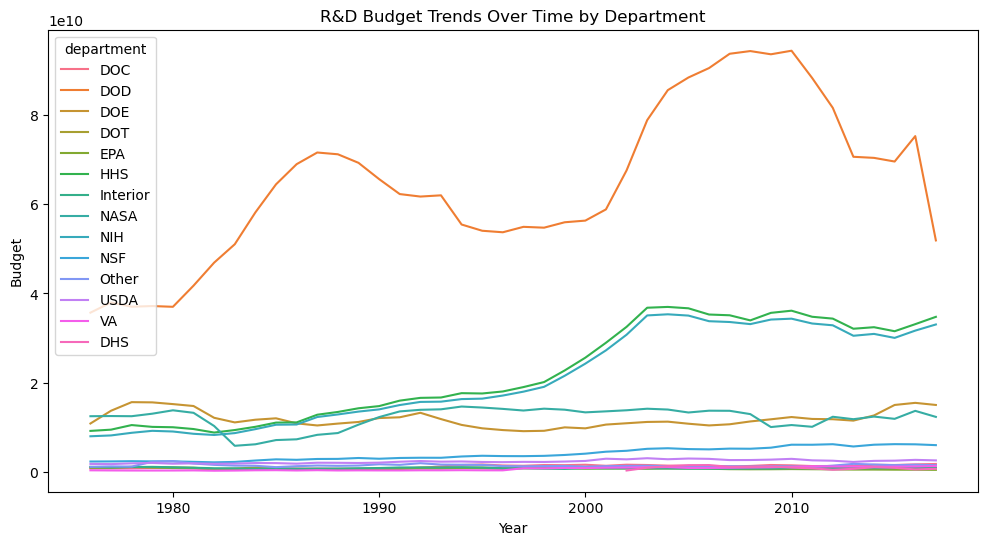

In [20]:
# Create a figure with a specified size for better visibility
plt.figure(figsize=(12, 6))
# Plot a line graph with data from rd_budget_long, showing the budget over time by department
sns.lineplot(data=rd_budget_long, x="year", y="budget", hue="department")
# Set the title of the graph
plt.title("R&D Budget Trends Over Time by Department")
# Label the x-axis as "Year"
plt.xlabel("Year")
# Label the y-axis as "Budget"
plt.ylabel("Budget")
# Display the plot
plt.show()

This visualization shows the R&D spending trends over time for each department. Given that there are 14 departments with varying spending levels, it is challenging to identify clear patterns for each department in the plot. The departments with the largest budgets—such as the **Department of Defense (DOD)**, **Department of Energy (DOE)**, **NASA (National Aeronautics and Space Administration)**, **Department of Health and Human Services (HHS)**, and **National Institutes of Health (NIH)**—stand out clearly due to their high spending levels. This is expected, as these departments are important for the government and likely have large-scale budgets for research and development.

However, other departments with smaller R&D spending budgets blend together in the visualization, making it difficult to distinguish their individual trends. To gain a better understanding of the growth patterns of these smaller departments, we will now focus on them separately and analyze their trends more closely.


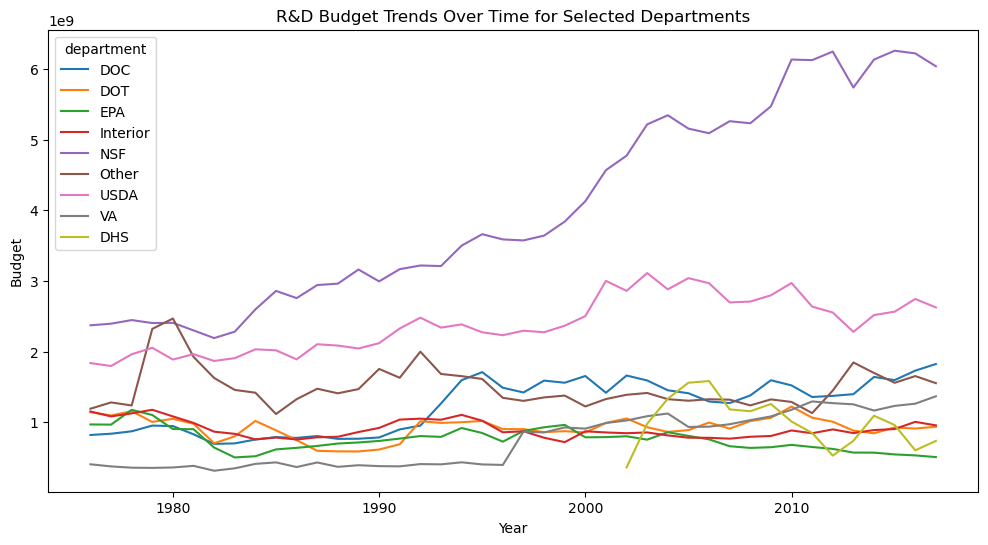

In [21]:
# Filter the dataset to include only specific departments (everything except for DOD, DOE, NASA, HHS, and NIH)
selected_departments = ["DOC", "DOT", "EPA", "Interior", "NSF", "Other", "USDA", "VA", "DHS"]
# Apply the filter to the data, keeping only the rows where the department is in the selected list
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]
# Create a figure with a specified size for better visibility
plt.figure(figsize=(12, 6))
# Plot a line graph using the filtered data, showing the budget over time for each selected department
sns.lineplot(data=filtered_data, x="year", y="budget", hue="department")
# Set the title of the graph
plt.title("R&D Budget Trends Over Time for Selected Departments")
# Label the x-axis as "Year"
plt.xlabel("Year")
# Label the y-axis as "Budget"
plt.ylabel("Budget")
# Display the plot
plt.show()

#### Analysis of R&D Spending Trends by Department

Now that we can observe the spending patterns of all departments more closely, we can draw some conclusions from these specific line plots:
1. **Department of Defense (DOD)**: The DOD shows the highest R&D spending across all years, but its budget fluctuates significantly. In contrast, most other departments experience only small fluctuations and stay within a similar spending range. This could be due to the DOD's involvement in large, variable defense projects and the changing priorities over time.
2. **Department of Health and Human Services (HHS), National Institutes of Health (NIH), and National Science Foundation (NSF)**: These departments show consistent growth in R&D spending over the years, with only slight fluctuations. This indicates a steady increase in their budgets, likely due to growing investments in health and science-related research.
3. **Other Departments**: Most of the other departments generally remained within the same spending range, showing slight growth and occasional fluctuations over time. This pattern suggests stable but incremental increases in their R&D budgets.
4. **Department of Homeland Security (DHS)**: The DHS is the only department with missing data prior to the 2000s. The visualization clearly shows that R&D spending information for DHS starts from 2002, after the missing rows were deleted. This confirms that deleting the rows with missing observations was the right decision, as the data for this department is now properly reflected from the year it began recording R&D spending.

Next, I would like to compare the total R&D spending across departments. To do this, we will use a bar plot to visualize the total spending by each department.

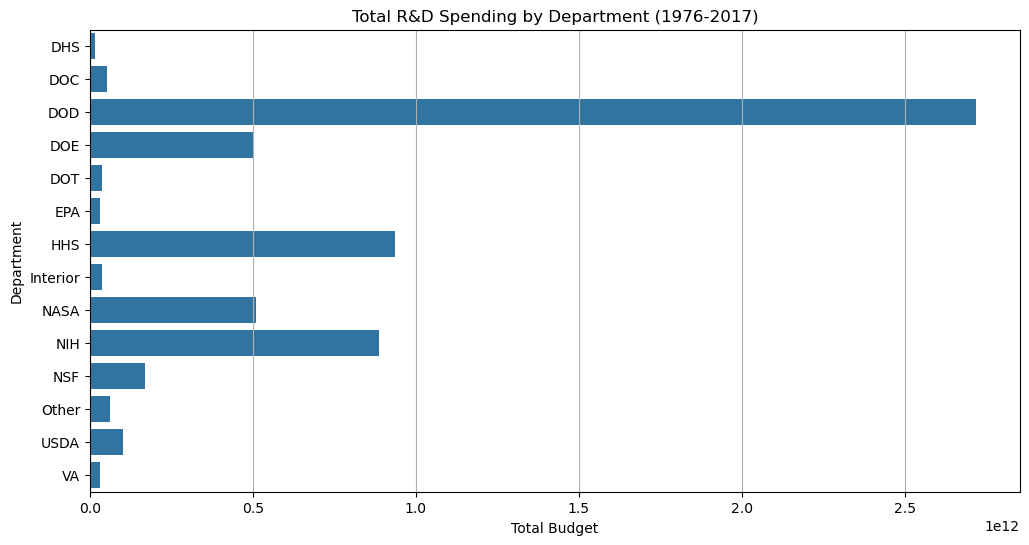

In [22]:
# Create a figure with a specified size for better visibility
plt.figure(figsize=(12, 6))
# Group the data by department and sum the budget for each department
total_budget_by_department = rd_budget_long.groupby("department")["budget"].sum().reset_index()
# Create a horizontal bar plot showing total budget by department
sns.barplot(data=total_budget_by_department, x="budget", y="department")
# Set the title of the graph
plt.title("Total R&D Spending by Department (1976-2017)")
# Label the x-axis as "Total Budget"
plt.xlabel("Total Budget")
# Label the y-axis as "Department"
plt.ylabel("Department")
# Add a grid to the x-axis for better readability
plt.grid(axis="x")
# Display the plot
plt.show()

#### Total R&D Spending by Department (1976-2017)

In this visualization, we can once again clearly see that the **Department of Defense (DOD)**, **Department of Health and Human Services (HHS)**, **National Institutes of Health (NIH)**, **NASA**, and **Department of Energy (DOE)** have the highest R&D spending across all years. These departments stand out with significantly larger total budgets.

On the other hand, the remaining departments have relatively similar total budgets, making them harder to distinguish in this plot. To better understand the total spending of these smaller departments, we will need to take a closer look.

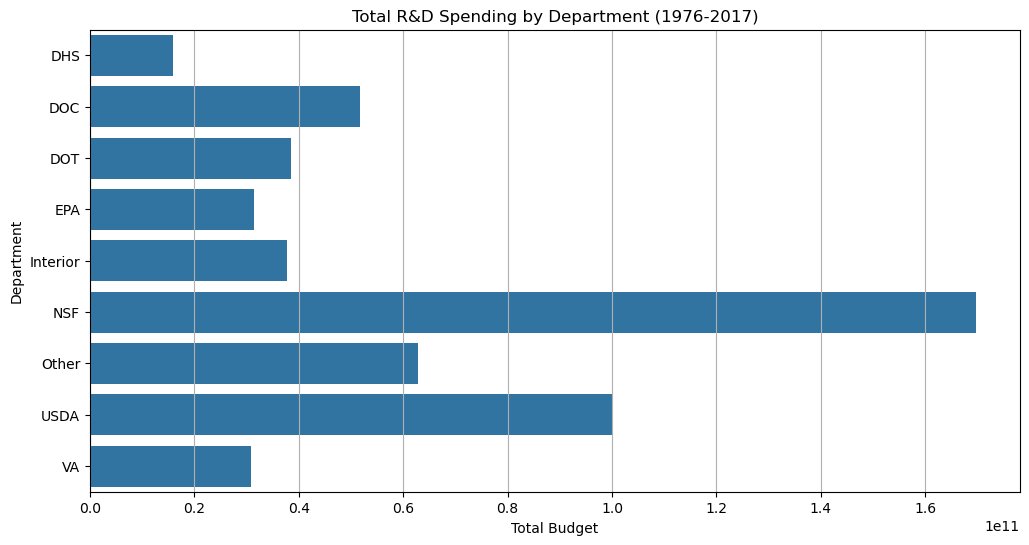

In [23]:
# Filter the dataset for specific departments (everything except for DOD, DOE, NASA, HHS, and NIH)
selected_departments = ["DOC", "DOT", "EPA", "Interior", "NSF", "Other", "USDA", "VA", "DHS"]
# Filter the dataset to include only the rows where the department is in the selected list
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]
# Create a figure with a specified size for better visibility
plt.figure(figsize=(12, 6))
# Group the filtered data by department and calculate the total budget for each department
total_budget_by_department = filtered_data.groupby("department")["budget"].sum().reset_index()
# Create a horizontal bar plot showing total budget by department
sns.barplot(data=total_budget_by_department, x="budget", y="department")
# Set the title of the graph
plt.title("Total R&D Spending by Department (1976-2017)")
# Label the x-axis as "Total Budget"
plt.xlabel("Total Budget")
# Label the y-axis as "Department"
plt.ylabel("Department")
# Add a grid to the x-axis for better readability
plt.grid(axis="x")
# Display the plot
plt.show()

We can see that the **National Science Foundation (NSF)** has the highest spending among the remaining departments, followed by the **US Department of Agriculture (USDA)** and **Other** research and development spending.

These observations provide valuable insights into the funding distribution across these key departments and their contributions to overall R&D spending over the years.

#### Visualization 1 Conclusion

Overall, most departments exhibit relatively stable spending year over year, with only minor fluctuations, which is expected. However, some departments, which are crucial to the functioning of the government, show significantly higher and more outstanding spending compared to others. Additionally, departments that experienced growth over the years also displayed corresponding increases in spending. 

Next, I will explore how these spending patterns correlate with GDP and investigate how changes in GDP may have influenced R&D spending over time.


### Visualization 2 - R&D Spending as a Percentage of GDP by Department

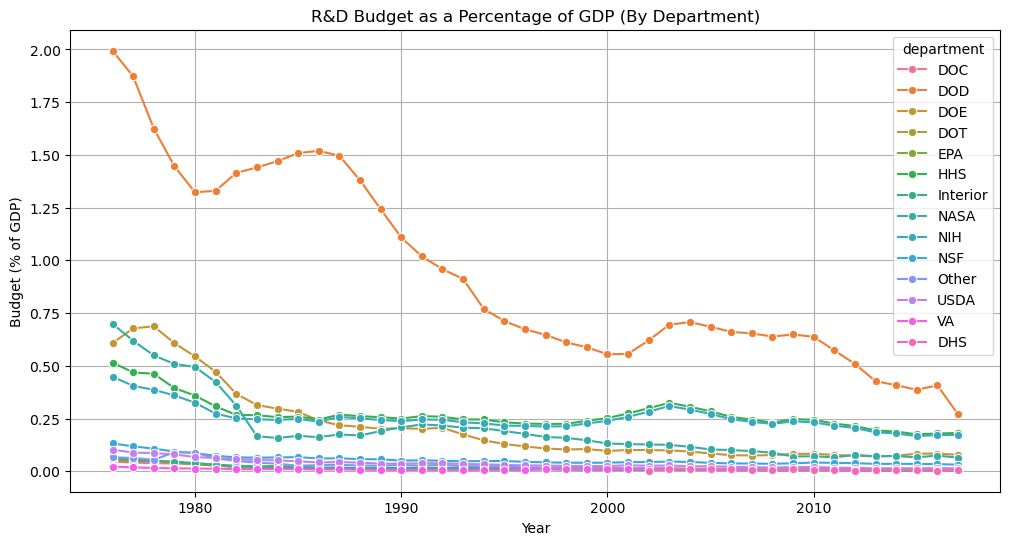

In [24]:
# Create a figure with a specified size for better visibility
plt.figure(figsize=(12, 6))
# Create a line plot that shows the R&D budget as a percentage of GDP for each department over the years
# The budget is divided by GDP and multiplied by 100 to get the percentage. Add a curcylar marker to make individual data points more visible
sns.lineplot(data=rd_budget_long, x="year", y= (rd_budget_long["budget"] / rd_budget_long["gdp"]) * 100, hue="department", marker="o")
# Set the title of the plot
plt.title("R&D Budget as a Percentage of GDP (By Department)")
# Label the x-axis as "Year"
plt.xlabel("Year")
# Label the y-axis as "Budget (% of GDP)"
plt.ylabel("Budget (% of GDP)")
# Add a grid to the plot for better readability
plt.grid(True)
# Display the plot
plt.show()

In this visualization, we encounter a similar issue where the **Department of Defense (DOD)** stands out significantly, occupying the highest percentage of the GDP. The key trend observed is that the percentage of GDP allocated to R&D by DOD decreases sharply over the years, from around 2% to 0.25%. Although, as seen in the previous visualization, the overall spending fluctuates around the same number, so the decline in the percentage suggests that **GDP** has grown substantially over time. As a result, the same level of spending now represents a smaller fraction of the total GDP.

To gain a better understanding, let’s divide the rest of the departments that blend together into two groups and take a closer look at their trends.

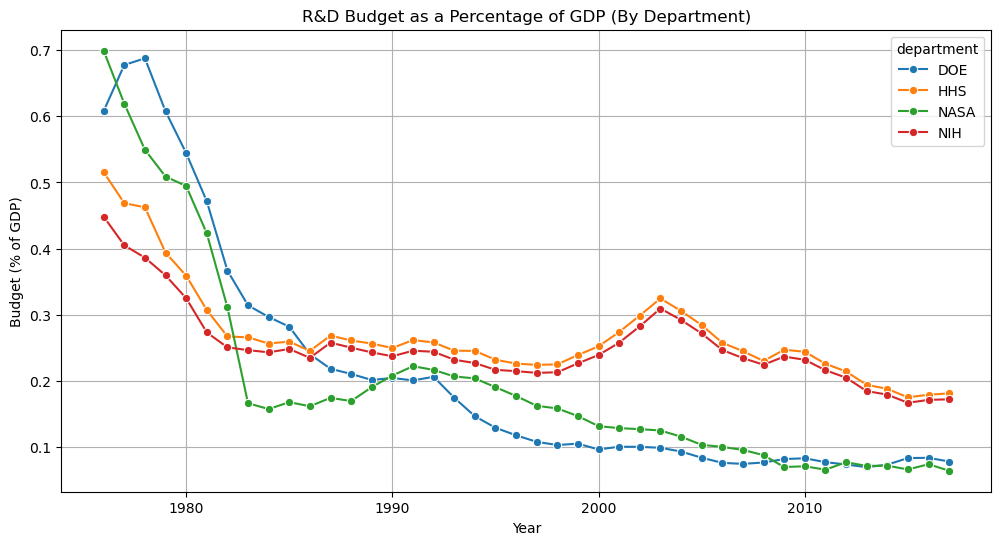

In [25]:
# Select the specific departments to the list
selected_departments = ["HHS", "DOE", "NASA", "NIH"]
# Filter the dataset to include only the selected departments
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]
# Create a new figure with a specific size for better readability
plt.figure(figsize=(12, 6))
# Plot a line chart showing R&D budget as a percentage of GDP for the selected departments
sns.lineplot(data=filtered_data, x="year", y=rd_budget_long["budget"] / rd_budget_long["gdp"] * 100, hue="department", marker="o")
# Add a title to the plot
plt.title("R&D Budget as a Percentage of GDP (By Department)")
# Label the x-axis as "Year"
plt.xlabel("Year")
# Label the y-axis as "Budget (% of GDP)"
plt.ylabel("Budget (% of GDP)")
# Add grid lines for better visualization
plt.grid(True)
# Display the plot
plt.show()

For the next four highest-spending departments—DOE, HHS, NASA, and NIH—the trend remains consistent: their R&D budget as a percentage of GDP has steadily declined over the years. Interestingly, while some of these departments experienced an increase in absolute spending, their share of GDP still decreased.  

This aligns with the trend observed in the Department of Defense (DOD). The reason behind this is that although R&D budgets grew, the overall GDP increased at a much faster rate, causing the percentage of GDP allocated to these departments to shrink over time.

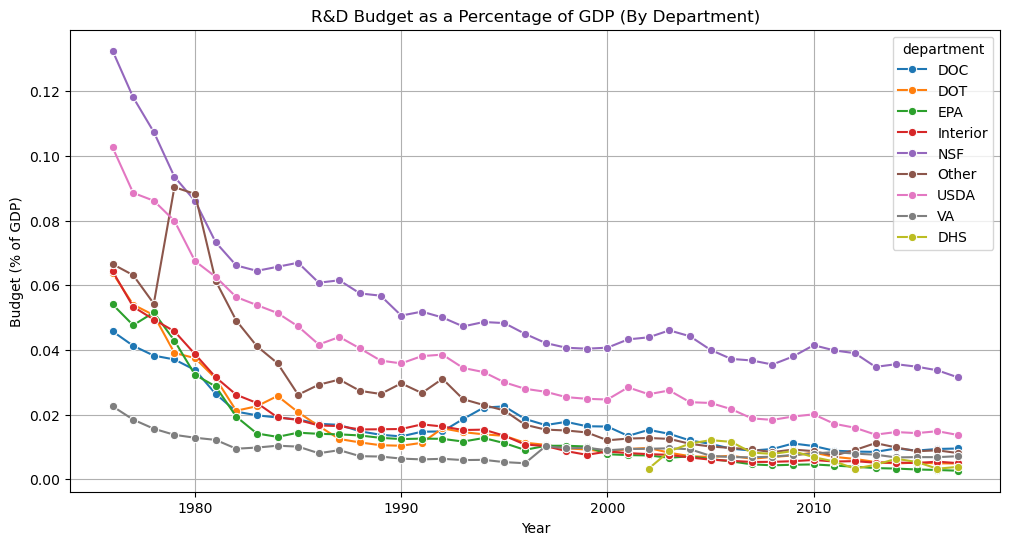

In [26]:
# Select the remaining departments
selected_departments = ["DOC", "DOT", "EPA", "Interior", "NSF", "Other", "USDA", "VA", "DHS"]
# Filter the dataset to include only the selected departments
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]
# Create a figure with a specified size
plt.figure(figsize=(12, 6))
# Plot a line graph showing R&D budget as a percentage of GDP for each department
sns.lineplot(data=filtered_data, x="year", y=rd_budget_long["budget"] / rd_budget_long["gdp"] * 100, hue="department", marker="o")
# Add a title to the plot
plt.title("R&D Budget as a Percentage of GDP (By Department)")
# Label the x-axis as "Year"
plt.xlabel("Year")
# Label the y-axis as "Budget (% of GDP)"
plt.ylabel("Budget (% of GDP)")
# Add gridlines for better readability
plt.grid(True)
# Display the plot
plt.show()

For the final group of departments, which had relatively low R&D spending (each contributing less than 0.1% of GDP), we observe a consistent downward trend over time. While some departments had nearly identical percentages, the overall pattern indicates a gradual decline. This suggests that despite potential increases in absolute spending, the growth in GDP outpaced these expenditures, causing their share of GDP to shrink.  

#### Visualization 2 Conclusion:  

The percentage of R&D spending relative to GDP has consistently declined across all departments. This trend suggests that while absolute R&D expenditures have remained relatively stable—aside from some year-over-year fluctuations—GDP growth has outpaced these expenditures, reducing their share of the total economy. This pattern holds true for both high-spending departments like DOD, HHS, and NASA, as well as lower-spending departments, indicating a broad, long-term shift in the proportion of national resources allocated to R&D.  

### Visualization 3 - Comparison of R&D Spending and GDP Over Time

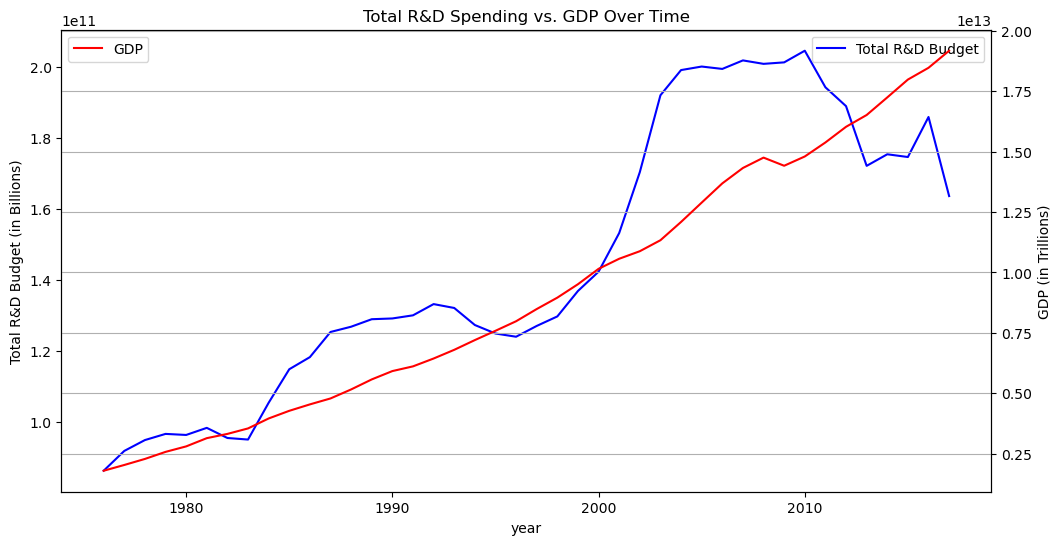

In [27]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))
# Plot the total R&D budget over the years (sum of all departments)
ax = sns.lineplot(
    data=rd_budget_long.groupby("year")["budget"].sum().reset_index(),  # Group data by year and sum the budget
    x="year",  # X-axis represents the year
    y="budget",  # Y-axis represents the total R&D budget
    label="Total R&D Budget",  # Label for the legend
    color="blue"  # Make the R&D budget line blue
)
# Create a second Y-axis to plot GDP on the same graph
ax2 = plt.twinx()
# Plot the GDP trend over the years (average GDP value)
sns.lineplot(
    data=rd_budget_long.groupby("year")["gdp"].mean().reset_index(),  # Group data by year and calculate average GDP
    x="year",  # X-axis remains the same (year)
    y="gdp",  # Y-axis represents GDP
    label="GDP",  # Label for the legend
    ax=ax2,  # Use the second Y-axis for this plot
    color="red"  # Make the GDP line red
)
# Set labels for both Y-axes
ax.set_ylabel("Total R&D Budget (in Billions)")  # Left Y-axis for R&D budget
ax2.set_ylabel("GDP (in Trillions)")  # Right Y-axis for GDP
# Set the title of the plot
plt.title("Total R&D Spending vs. GDP Over Time")
# Add a grid to make it easier to read values
plt.grid(True)
# Add a legend to identify the two lines
plt.legend(loc="upper left")
# Show the plot
plt.show()

#### Visualization 3 Conclusion  

This line graph clearly illustrates a steady year-over-year increase in GDP. While the total R&D budget also grew over time, its growth was less consistent, with fluctuations along the way. Overall, the R&D budget has not increased significantly—rising from approximately $1 billion to $1.6 billion—whereas GDP has seen a much more substantial increase, from around $0.25 trillion to nearly $2 trillion.  

This visualization supports our previous conclusions about the decreasing share of R&D spending as a percentage of GDP. It confirms that while R&D expenditures have risen slightly, GDP has grown at a much faster rate, making R&D spending a smaller fraction over time.  

Now, let's analyze the raw numbers more closely and summarize key insights using Pivot Tables.  

## Pivot Tables

### Introduction 

After visualizing the trends in R&D spending and its relationship with GDP, we now turn to pivot tables to summarize key insights more systematically. Pivot tables allow us to efficiently aggregate and analyze data, making it easier to identify patterns and trends across different time periods and departments.  

We will use three pivot tables for our analysis:  

1. **Total R&D Budget per Department (Yearly & Decadal)** – This helps us understand how each department's R&D spending has evolved over time and which departments have consistently received the most funding.  
2. **GDP per Year and Decade** – By examining GDP trends separately, we can compare overall economic growth with R&D spending patterns.  
3. **R&D Spending per Department as a Percentage of GDP (Yearly & Decadal)** – This allows us to assess how the importance of R&D investment has shifted relative to economic growth and whether certain departments have increased or decreased their share of national R&D funding.  

### Pivot Table 1 - Total R&D Budget per Department (Yearly & Decadal)

In [28]:
# Create a pivot table to summarize the total R&D budget for each department per year.
# - "values='budget'" specifies that we want to aggregate the budget data.
# - "index='department'" sets the department names as row labels.
# - "columns='year'" organizes the data by year across columns.
# - "aggfunc='sum'" ensures we sum up the budget values for each department per year.
pivot_table_transposed = rd_budget_long.pivot_table(values="budget", index="department", columns="year", aggfunc="sum")
# Display the pivot table
print("\nTotal R&D Budget per Department (Rows) per Year (Columns):\n", pivot_table_transposed)


Total R&D Budget per Department (Rows) per Year (Columns):
 year                 1976           1977           1978           1979  \
department                                                               
DHS                   NaN            NaN            NaN            NaN   
DOC          819000000.00   837000000.00   871000000.00   952000000.00   
DOD        35696000000.00 37967000000.00 37022000000.00 37174000000.00   
DOE        10882000000.00 13741000000.00 15663000000.00 15612000000.00   
DOT         1142000000.00  1095000000.00  1156000000.00  1004000000.00   
EPA          968000000.00   966000000.00  1175000000.00  1102000000.00   
HHS         9226000000.00  9507000000.00 10533000000.00 10127000000.00   
Interior    1152000000.00  1082000000.00  1125000000.00  1176000000.00   
NASA       12513000000.00 12553000000.00 12516000000.00 13079000000.00   
NIH         8025000000.00  8214000000.00  8802000000.00  9243000000.00   
NSF         2372000000.00  2395000000.00  244600000

The current pivot table is hard to analyze due to the large number of years (four decades), making it impossible to display all the data in the Jupyter notebook. To make the analysis easier, we will group the years by decades and create a new pivot table that summarizes the budget data by decade. This will help us gain a more manageable and insightful view of the trends over time.

In [29]:
# Create a pivot table that sums the budget per department for each decade
pivot_table_transposed = rd_budget_long.pivot_table(
    values="budget",  # We are summing the 'budget' values
    index="department",  # Rows represent different departments
    columns=rd_budget_long["year"] // 10 * 10,  # Convert the 'year' into decades (e.g., 1970, 1980, etc.)
    aggfunc="sum"  # Aggregate by summing the budget values for each department per decade
)
# Sort the pivot table by the total R&D budget across all decades in descending order
pivot_table_transposed = pivot_table_transposed.loc[pivot_table_transposed.sum(axis=1).sort_values(ascending=False).index]
# Display the pivot table, showing total R&D budget per department per decade
print("\nTotal R&D Budget per Department (Rows) per Decade (Columns):\n", pivot_table_transposed)



Total R&D Budget per Department (Rows) per Decade (Columns):
 year                  1970            1980            1990            2000  \
department                                                                   
DOD        147859000000.00 580046000000.00 580148000000.00 807116000000.00   
HHS         39393000000.00 110936000000.00 179389000000.00 337530000000.00   
NIH         34284000000.00 104399000000.00 169154000000.00 322390000000.00   
NASA        50661000000.00  91791000000.00 139167000000.00 132918000000.00   
DOE         55898000000.00 120532000000.00 107752000000.00 109067000000.00   
NSF          9617000000.00  26459000000.00  34397000000.00  50251000000.00   
USDA         7649000000.00  19798000000.00  23090000000.00  28565000000.00   
Other        6029000000.00  15688000000.00  15704000000.00  13188000000.00   
DOC          3479000000.00   7823000000.00  13260000000.00  14722000000.00   
DOT          4397000000.00   7945000000.00   8859000000.00   9558000000.00   
I

This pivot table shows the total R&D budget per department for each decade from 1970 to 2010. Each row represents a department, while the columns correspond to specific decades (1970, 1980, 1990, 2000, and 2010).

#### Pivot Table 1 Conclusions: 
- DOD (Department of Defense) consistently has the highest R&D budget, with significant increases in spending from 1970 to 2010. Its budget grew dramatically, especially in the 1980s and 2000s.
- HHS (Department of Health and Human Services), NIH (National Institutes of Health), and NASA (National Aeronautics and Space Administration) have also shown steady growth, with NIH and HHS having the most noticeable increases over the decades.
- DOE (Department of Energy) and NSF (National Science Foundation) exhibit a general upward trend. 

Overall, the pivot table highlights how certain key departments, particularly DOD, HHS, and NIH, dominate R&D spending over time, with some smaller departments showing steady but more modest increases in their budgets.

### Pivot Table 2 - GDP per Year and Decades

In [30]:
# Pivot table to show GDP across years

# Create a pivot table to calculate the mean GDP per year, using 'year' as the index and 'gdp' as the values. 
# The 'aggfunc="mean"' ensures that it takes the average GDP for each year as there are multiple entries.
gdp_pivot = rd_budget_long.pivot_table(values="gdp", index="year", aggfunc="mean")
# Print the resulting pivot table
print(gdp_pivot)

                   gdp
year                  
1976  1790000000000.00
1977  2028000000000.00
1978  2278000000000.00
1979  2570000000000.00
1980  2797000000000.00
1981  3138000000000.00
1982  3314000000000.00
1983  3541000000000.00
1984  3953000000000.00
1985  4270000000000.00
1986  4536000000000.00
1987  4782000000000.00
1988  5155000000000.00
1989  5570000000000.00
1990  5915000000000.00
1991  6110000000000.00
1992  6435000000000.00
1993  6795000000000.00
1994  7198000000000.00
1995  7583000000000.00
1996  7978000000000.00
1997  8483000000000.00
1998  8955000000000.00
1999  9511000000000.00
2000 10148000000000.00
2001 10565000000000.00
2002 10877000000000.00
2003 11332000000000.00
2004 12089000000000.00
2005 12889000000000.00
2006 13685000000000.00
2007 14323000000000.00
2008 14752000000000.00
2009 14415000000000.00
2010 14799000000000.00
2011 15379000000000.00
2012 16027000000000.00
2013 16516000000000.00
2014 17244000000000.00
2015 17983000000000.00
2016 18470000000000.00
2017 191770

Due to the size of the dataset, it's not possible to view the GDP figures for each individual year in this pivot table. However, based on the visualization graph, we know that GDP has consistently grown year over year. The same upward trend is evident in this pivot table, further confirming the steady economic growth over time. To examine this in more detail, I will now summarize the GDP data by decade and calculate their means and sums in the following pivot tables.

In [31]:
# Create a pivot table to calculate the sum of GDP per decade by grouping years into decades
gdp_decade_pivot = rd_budget_long.pivot_table(
    values="gdp",  # The column we are interested in (GDP values)
    index=rd_budget_long["year"] // 10 * 10,  # Group years into decades
    aggfunc="sum"  # Aggregate the GDP values by summing them for each decade
)

# Display the sum of GDP for each decade
print('\nSum GDP for each decade:\n', gdp_decade_pivot)



Sum GDP for each decade:
                      gdp
year                    
1970  112658000000000.00
1980  533728000000000.00
1990  974519000000000.00
2000 1730337000000000.00
2010 1898330000000000.00


In [32]:
# Create a pivot table to calculate the mean of GDP per decade by grouping years into decades
gdp_decade_pivot = rd_budget_long.pivot_table(
    values="gdp",  # The column we are interested in (GDP values)
    index=rd_budget_long["year"] // 10 * 10,  # Group years into decades (e.g., 1970s, 1980s, etc.)
    aggfunc="mean"  # Aggregate the GDP values by calculating the mean for each decade
)

# Display the mean GDP for each decade
print('\nMean yearly GDP for each decade:\n', gdp_decade_pivot)



Mean yearly GDP for each decade:
                    gdp
year                  
1970  2166500000000.00
1980  4105600000000.00
1990  7496300000000.00
2000 12538673913043.48
2010 16949375000000.00


#### Pivot Table 2 Conclusion: 

The pivot table shows a clear and consistent growth in GDP over each decade, indicating a steady expansion of the economy. As time progressed, the rate of growth seems to have accelerated, especially in the more recent decades. 

### Pivot Table 3 - R&D Spending per Department as a Percentage of GDP (Yearly & Decadal)

In [35]:
# Pivot table for total R&D spending and GDP, grouped by decade
spending_gdp_decade_pivot = rd_budget_long.pivot_table(
    values=["budget", "gdp"],  # We are interested in the total R&D budget and the total GDP for each decade
    index= (rd_budget_long["year"] // 10) * 10,  # Group the years into decades by dividing the year by 10 and multiplying by 10 (e.g., 1970, 1980, etc.)
    aggfunc="sum"  # Aggregate the budget and GDP by summing the values for each decade
)
# Calculate the percentage of GDP spent on R&D per decade
spending_gdp_decade_pivot["percentage"] = (spending_gdp_decade_pivot["budget"] / spending_gdp_decade_pivot["gdp"]) * 100  # Calculate the percentage for each decade as (total R&D spending / GDP) * 100
# Display the Pivot Table 
print(spending_gdp_decade_pivot)

               budget                 gdp  percentage
year                                                 
1970  369499000000.00  112658000000000.00        0.33
1980 1104513000000.00  533728000000000.00        0.21
1990 1294108000000.00  974519000000000.00        0.13
2000 1860451000000.00 1730337000000000.00        0.11
2010 1459359000000.00 1898330000000000.00        0.08


#### Pivot Table 3 Conclusion:

I started by grouping the data into decades. Looking at the numbers, we can see that the budget as a percentage of GDP has been decreasing over time, from 0.33% in 1970 to 0.08% in 2010. It's worth mentioning that the GDP figures are repeated for every observation, which affects the accuracy of the data. Unfortunately, I couldn't find a way to account for just one GDP per year, so I had to work with this limitation. Even with this issue, it’s clear that although both the budget and GDP have grown significantly, the budget’s share of the economy has become smaller. This suggests that while the total amount of government spending and the economy have both increased, the government’s spending is now a smaller portion of the economy. This could indicate a shift in how government spending is prioritized or how it compares to overall economic output.

## Tidy Data Project Conclusion

## Conclusion

In conclusion, this project consisted of three main parts: tidying the dataset, visualizing findings, and creating pivot tables.

### Tidying the Dataset
Tidying the dataset was both an interesting and new experience for me, as it was my first introduction to the principles of tidy data. I demonstrated how I believe a different format would be more convenient for perception purposes and how it contrasts with the principles of tidy data. If I had not known the principles of tidy data, I would have left the data in a format where the years are columns and each row represents each department's spending across all years. However, this does not align with the principles of tidy data. This process taught me a lot of new skills and provided valuable information that will be useful in future coding projects, particularly for data preparation and cleaning.

### Visualizing Findings and Pivot Tables
The next two parts involved analyzing the data through visualizations and pivot tables. Given that the dataset only has four variables, I believe it would have been sufficient to use either visualizations or pivot tables. The conclusions from both analyses confirmed each other, and there was no significant new information added. As a result, the findings became somewhat repetitive. In this case, visualizations were more efficient, especially when splitting the data by departments. Pivot tables were harder to interpret, primarily because the dataset contains nearly 600 observations, making it less effective to draw conclusions from tables as opposed to visualizations. Visualizations were more effective in this case, and I believe they would have been sufficient for analyzing the data, unless we needed to back them up with numerical figures. Analyzing it from a viewer's standpoint and considering the concepts we've discussed in class about conveying data insights visually, I think visualizations are much more efficient.

### Final Thoughts
Overall, this project was both useful and interesting. I learned a lot of new things and thoroughly enjoyed working with the dataset.
